##Generación de caracteristicas para cada péptido


In [ ]:
!pip install propy3
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.3/290.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from Bio import SeqIO
from propy import PyPro
from propy.GetProteinFromUniprot import GetProteinSequence
from google.colab import drive
from sklearn.model_selection import train_test_split

##Rutas de archivos principales

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Laboratorio Integrado I/output_fasta_peptides_completo.fasta'
path2 = '/content/drive/MyDrive/Colab Notebooks/Laboratorio Integrado I/df_final.csv'
path3 = '/content/drive/MyDrive/Colab Notebooks/AMP/output_fasta_peptides_completo.fasta'

In [ ]:
df_final = pd.read_csv(path2)
df_sequences = df_final[['id','sequence']]

In [ ]:
df_sequences.head(10)

,id,sequence
0,peptide_0,GIGAVLKVLTTGLPALISWIKRKRQQ
1,peptide_1,GIGKFLHSAKKFGKAFVGEIMNS
2,peptide_2,ILPWKWPWWPWRR
3,peptide_3,KWCFRVCYRGICYRRCR
4,peptide_4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES
5,peptide_5,FFHHIFRGIVHVGKTIHRLVTG
6,peptide_6,FLPLIGRVLSGIL
7,peptide_7,FWGALAKGALKLIPSLFSSFSKKD
8,peptide_8,GWGSFFKKAAHVGKHVGKAALTHYL
9,peptide_9,ACNFQSCWATCQAQHSIYFRRAFCDRSQCKCVFVRG


In [ ]:
df_sequences.shape

(40840, 2)

In [ ]:
df_sequences.to_csv('df_sequences.csv', index=False)

Ayuda para entender mejor la librería Propy3

In [ ]:
# Crear un objeto de descriptores para probar
des_object = PyPro.GetProDes('ACDEFGHIKLMNPQRSTVWY')

# Obtener ayuda sobre el objeto
help(des_object)

Help on GetProDes in module propy.PyPro object:

class GetProDes(builtins.object)
 |  GetProDes(ProteinSequence: str = '') -> None
 |  
 |  Collect all descriptor calcualtion modules.
 |  
 |  Methods defined here:
 |  
 |  GetAAComp(self) -> Dict[str, float]
 |      Amino acid compositon descriptors (20).
 |      
 |      Examples
 |      --------
 |      >>> from propy.GetProteinFromUniprot import GetProteinSequence
 |      >>> protein = GetProteinSequence(ProteinID="Q9NQ39")
 |      >>> result = GetProDes(protein).GetAAComp()
 |  
 |  GetAAindex1(self, name: str, path: Optional[str] = '.') -> Dict[str, float]
 |      Get the amino acid property values from aaindex1.
 |      
 |      Parameters
 |      ----------
 |      name : str
 |          is the name of amino acid property (e.g., KRIW790103)
 |      
 |      Returns
 |      -------
 |      result is a dict form containing the properties of 20 amino acids
 |      
 |      Examples
 |      --------
 |      >>> from propy.GetProtei

##Calculo de los descriptores PAAC de forma individual

In [ ]:
def read_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, 'fasta'):
        sequences.append((record.id, str(record.seq)))
    return sequences

def compute_descriptors_test(sequences):
    results = []
    for seq_id, seq in sequences:
        des_object = PyPro.GetProDes(seq)

        # PAAC
        paac = des_object.GetPAAC(lamda=5, weight=0.05)

        # Preparar el resultado como un diccionario
        result = {'id': seq_id}

        result.update(paac)

        results.append(result)

    return pd.DataFrame(results)


In [ ]:
sequences = read_fasta(path1)

df_descriptors = compute_descriptors_test(sequences)

In [ ]:
df_descriptors_paac = df_descriptors

Se exporta el archivo con los descriptores PAAC de los péptidos para no volver a ejecutar la celda por temas de eficiencia.

In [ ]:
df_descriptors_paac.to_csv('df_descriptors_paac.csv', index=False)

##Calculo de las otras carácteristicas fisicoquimicas utilizando Propy3

In [ ]:
def read_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, 'fasta'):
        sequences.append((record.id, str(record.seq)))
    return sequences

def compute_descriptors(sequences):
    results = []
    for seq_id, seq in sequences:
        des_object = PyPro.GetProDes(seq)

        # Composición de Aminoácidos
        aac = des_object.GetAAComp()

        # Dipeptide Composition (DPC)
        dpc = des_object.GetDPComp()

        # Composition, Transition, Distribution (CTD)
        ctd = des_object.GetCTD()

        #Mbauto
        mbauto = des_object.GetMoreauBrotoAuto()

        # Moranauto
        moranauto = des_object.GetMoranAuto()

        #Geryauto
        geryauto = des_object.GetGearyAuto()

        # Sequence Order Cumulative Number (SOCN)
        socn = des_object.GetSOCN()

        # Quasi-Symmetric Order (QSO)
        qso = des_object.GetQSO()

        # Preparar el resultado como un diccionario
        result = {'id': seq_id}
        result.update(aac)
        result.update(dpc)
        result.update(ctd)
        result.update(mbauto)
        result.update(moranauto)
        result.update(geryauto)
        result.update(socn)
        result.update(qso)
        results.append(result)

    return pd.DataFrame(results)


In [ ]:
sequences = read_fasta(path1)

df_descriptors = compute_descriptors(sequences)

In [ ]:
df_descriptors.iloc[:, 1:]

,A,R,N,D,C,E,Q,G,H,I,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,7.692,7.692,0.000,0.000,0.000,0.000,7.692,11.538,0.000,11.538,...,0.020989,0.014686,0.012446,0.006902,0.002686,0.000000,0.000000,0.000000,0.000000,0.000000
1,8.696,0.000,4.348,0.000,0.000,4.348,0.000,17.391,4.348,8.696,...,0.009988,0.001179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000,15.385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000,29.412,0.000,0.000,23.529,0.000,0.000,5.882,0.000,5.882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000,13.514,2.703,5.405,0.000,8.108,2.703,5.405,0.000,8.108,...,0.025547,0.017740,0.022454,0.029931,0.022450,0.007209,0.014647,0.017532,0.013910,0.008937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,11.429,5.714,2.857,0.000,0.000,0.000,11.429,5.714,2.857,2.857,...,0.021349,0.032427,0.022858,0.021531,0.023839,0.018923,0.014843,0.016204,0.011915,0.009568
40836,0.000,0.000,15.385,7.692,0.000,7.692,7.692,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40837,17.647,17.647,5.882,5.882,0.000,5.882,5.882,0.000,0.000,5.882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40838,6.452,3.226,12.903,3.226,0.000,0.000,0.000,3.226,3.226,16.129,...,0.025101,0.027006,0.029928,0.019077,0.018889,0.011021,0.008275,0.012708,0.008093,0.001881


In [ ]:
df_descriptors

,id,A,R,N,D,C,E,Q,G,H,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,peptide_0,7.692,7.692,0.000,0.000,0.000,0.000,7.692,11.538,0.000,...,0.020989,0.014686,0.012446,0.006902,0.002686,0.000000,0.000000,0.000000,0.000000,0.000000
1,peptide_1,8.696,0.000,4.348,0.000,0.000,4.348,0.000,17.391,4.348,...,0.009988,0.001179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,peptide_2,0.000,15.385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,peptide_3,0.000,29.412,0.000,0.000,23.529,0.000,0.000,5.882,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,peptide_4,0.000,13.514,2.703,5.405,0.000,8.108,2.703,5.405,0.000,...,0.025547,0.017740,0.022454,0.029931,0.022450,0.007209,0.014647,0.017532,0.013910,0.008937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,peptide_43335,11.429,5.714,2.857,0.000,0.000,0.000,11.429,5.714,2.857,...,0.021349,0.032427,0.022858,0.021531,0.023839,0.018923,0.014843,0.016204,0.011915,0.009568
40836,peptide_43336,0.000,0.000,15.385,7.692,0.000,7.692,7.692,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40837,peptide_43337,17.647,17.647,5.882,5.882,0.000,5.882,5.882,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40838,peptide_43338,6.452,3.226,12.903,3.226,0.000,0.000,0.000,3.226,3.226,...,0.025101,0.027006,0.029928,0.019077,0.018889,0.011021,0.008275,0.012708,0.008093,0.001881


In [ ]:
df_descriptors.shape

(40840, 1478)

##Exportamos el csv descriptors para no volver a ejecutar la función de calcular los descriptores cada vez que se ejecute el notebook.

In [ ]:
df_descriptors.to_csv('df_descriptors.csv', index=False)

##Descriptores fisicoquimicos con R


Para ejecutar las siguiente celdas, cambiar el entorno de ejecución de python3 a R

In [ ]:
# Instala un paquete en R
install.packages("Peptides")
library(Peptides)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df <- read.csv('df_sequences.csv')

In [ ]:
head(df, 10)

,id,sequence
,<chr>,<chr>
1,peptide_0,GIGAVLKVLTTGLPALISWIKRKRQQ
2,peptide_1,GIGKFLHSAKKFGKAFVGEIMNS
3,peptide_2,ILPWKWPWWPWRR
4,peptide_3,KWCFRVCYRGICYRRCR
5,peptide_4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES
6,peptide_5,FFHHIFRGIVHVGKTIHRLVTG
7,peptide_6,FLPLIGRVLSGIL
8,peptide_7,FWGALAKGALKLIPSLFSSFSKKD
9,peptide_8,GWGSFFKKAAHVGKHVGKAALTHYL


In [ ]:
#cargar csv
df <- read.csv("df_sequences.csv")

# Definir la función para calcular propiedades peptídicas
calcular_propiedades_peptidicas <- function(df, secuencia_col) {
  # Aplicar las funciones del paquete Peptides a la columna de secuencias
  df$Longitud <- sapply(df[[secuencia_col]], nchar)
  df$Indice_Boman <- sapply(df[[secuencia_col]], boman)
  df$Carga <- sapply(df[[secuencia_col]], charge)  # Carga
  df$Punto_Isoelectrico <- sapply(df[[secuencia_col]], pI)  # Punto isoeléctrico
  df$Hidrofobicidad <- sapply(df[[secuencia_col]], hydrophobicity)  # Hidrofobicidad

  return(df)
}

df_properties <- calcular_propiedades_peptidicas(df, "sequence")

In [ ]:
tail(df_properties, 10)

,id,sequence,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,Hidrofobicidad
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
40831,peptide_43330,EKLGANAILGVSLAVAKAAANELRMPLFRYLG,32,0.2512500,2.0000874404,10.239781,0.5406250
40832,peptide_43331,ANKEALGIYVADLDGNEYGVGDYEYPFTI,29,0.9868966,-4.9990475706,3.532167,-0.2689655
40833,peptide_43332,IFKLALACNKV,11,-0.8127273,1.9354195158,9.676251,1.2636364
40834,peptide_43333,FKHGIPIDADYVFDVRFLPNPHWDPKLRPMT,31,1.6245161,0.1801413133,7.704007,-0.4806452
40835,peptide_43334,FTSMPVYAIIVANFCRSWTFYLLLISQPAYF,31,-0.5822581,0.9334550295,8.487526,1.0000000
40836,peptide_43335,SNQKQALAQPQTFAHIRVFFRPLPFAFFGTVGFYS,35,0.8031429,3.0877413196,11.530512,0.1085714
40837,peptide_43336,ETVDLKLNLQSNK,13,2.5092308,-0.0003841614,6.492972,-0.8615385
40838,peptide_43337,DRALAPNIRSAKQMVER,17,3.5152941,1.9999009385,11.378050,-0.8235294
40839,peptide_43338,HDNKSKNNTFNGAIAYVIPFLLFIFVIRSLI,31,0.3725806,2.0878960812,10.243799,0.5967742


In [ ]:
write.csv(df_properties,"df_properties.csv", row.names = FALSE)

##Características completas

Importamos los dfs y unimos para tener el df completo

In [ ]:
df_properties = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMP/df_properties_final.csv')
df_descriptors_paac = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMP/df_descriptors_paac.csv')

In [ ]:
df_all_properties = df_properties.merge(df_descriptors_paac, on='id', how='right')

In [ ]:
df_all_properties.columns

Index(['id', 'sequence', 'Longitud', 'Indice_Boman', 'Carga',
       'Punto_Isoelectrico', 'Hidrofobicidad', 'A', 'R', 'N',
       ...
       'PAAC16', 'PAAC17', 'PAAC18', 'PAAC19', 'PAAC20', 'PAAC21', 'PAAC22',
       'PAAC23', 'PAAC24', 'PAAC25'],
      dtype='object', length=1509)

In [ ]:
df_all_properties.head()

,id,sequence,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,Hidrofobicidad,A,R,N,...,PAAC16,PAAC17,PAAC18,PAAC19,PAAC20,PAAC21,PAAC22,PAAC23,PAAC24,PAAC25
0,peptide_0,GIGAVLKVLTTGLPALISWIKRKRQQ,26,0.570000,4.997093,12.546070,0.273077,7.692,7.692,0.000,...,2.646,5.293,2.646,0.000,5.293,5.054,5.918,4.968,7.060,8.189
1,peptide_1,GIGKFLHSAKKFGKAFVGEIMNS,23,0.419130,3.089488,10.802733,0.082609,8.696,0.000,4.348,...,5.567,0.000,0.000,0.000,2.784,7.414,9.107,6.674,6.124,6.661
2,peptide_2,ILPWKWPWWPWRR,13,1.069231,2.997683,12.516461,-1.069231,0.000,15.385,0.000,...,0.000,0.000,20.956,0.000,0.000,9.821,7.018,9.467,11.736,7.473
3,peptide_3,KWCFRVCYRGICYRRCR,17,3.535294,5.748073,10.068130,-0.517647,0.000,29.412,0.000,...,0.000,0.000,3.161,6.322,3.161,10.336,9.635,10.674,7.020,8.600
4,peptide_4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,37,3.000000,6.002416,11.346921,-0.724324,0.000,13.514,2.703,...,3.164,1.582,0.000,0.000,3.164,8.037,10.856,7.481,5.494,9.594


In [ ]:
from scipy.stats import shapiro

# Realizar la prueba Shapiro-Wilk para cada columna del DataFrame
resultados = {}

df = df_all_properties.iloc[:,2:]

for columna in df.columns:
    stat, p = shapiro(df[columna])
    resultados[columna] = p
    print(f'Columna: {columna} - Estadístico: {stat}, p-value: {p}')

    if p > 0.05:
        print(f' -> {columna}: Los datos parecen tener una distribución normal.')
    else:
        print(f' -> {columna}: Los datos no siguen una distribución normal.')

# Opcional: Crear un DataFrame con los resultados para visualizar mejor
df_resultados = pd.DataFrame(resultados.items(), columns=['Columna', 'p-value'])
print(df_resultados)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40840.
  res = hypotest_fun_out(*samples, **kwds)


Columna: Longitud - Estadístico: 0.7866853184325882, p-value: 5.986887475725702e-112
 -> Longitud: Los datos no siguen una distribución normal.
Columna: Indice_Boman - Estadístico: 0.9782719349929323, p-value: 6.614799239422252e-59
 -> Indice_Boman: Los datos no siguen una distribución normal.
Columna: Carga - Estadístico: 0.9612748889562254, p-value: 1.0749362833465493e-70
 -> Carga: Los datos no siguen una distribución normal.
Columna: Punto_Isoelectrico - Estadístico: 0.9392133434978874, p-value: 1.165036454617871e-80
 -> Punto_Isoelectrico: Los datos no siguen una distribución normal.
Columna: Hidrofobicidad - Estadístico: 0.9937537182191609, p-value: 3.1314983763610813e-37
 -> Hidrofobicidad: Los datos no siguen una distribución normal.
Columna: A - Estadístico: 0.8616660973598931, p-value: 1.4483446826199758e-100
 -> A: Los datos no siguen una distribución normal.
Columna: R - Estadístico: 0.7777775737855118, p-value: 4.6752855073542754e-113
 -> R: Los datos no siguen una distrib

##Varianza de las columnas sin normalizar

In [ ]:
varianza_columnas = df_all_properties.iloc[:, 2:].var()

In [ ]:
varianza_columnas = varianza_columnas.to_numpy()

In [ ]:
varianza_columnas.mean()

967177654.8702816

In [ ]:
for i in varianza_columnas:
  print(i)

316.4311013556039
2.670848596382628
12.092109055759735
8.158346235798206
0.7622781325097783
53.92261174241661
79.31591568584554
18.958396407086774
19.721609096104842
36.34374360437218
29.189113907382435
18.379163800943612
46.23812731127523
20.31705709806565
36.28843829799437
75.14652882849182
87.65718119964143
13.408332796214989
32.1430941771285
39.66238353797237
32.963027472662176
25.307166136240234
32.30987222537494
15.778300642620334
36.96380903653141
4.861035284495789
2.366765784318148
0.9926378899219023
1.1620667302180425
0.9772187389927227
1.5010625612872832
0.9379016308439181
3.061203213169634
1.0569230076130989
2.515652619378984
5.9615756392358215
5.22673716172791
0.6534457119422561
1.8682226689612416
1.4492660086600788
2.3043983508914714
1.7439253676596056
0.9164152792424249
0.8197922365858368
2.664948122098581
2.0451945159293974
8.478455881417867
1.2711333754997618
1.0571131937166778
1.9263672956024926
1.1067986913855052
1.0073871842486197
2.435437005454807
1.0614457748273909

##Normalización de los datos con MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
array_scaled = scaler.fit_transform(df_all_properties.iloc[:,2:])

In [ ]:
df_min_max = pd.DataFrame(array_scaled, columns=df_all_properties.iloc[:,2:].columns)

In [ ]:
df_min_max

,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,Hidrofobicidad,A,R,N,D,C,...,PAAC16,PAAC17,PAAC18,PAAC19,PAAC20,PAAC21,PAAC22,PAAC23,PAAC24,PAAC25
0,0.204301,0.283376,0.403184,0.877668,0.583464,0.106833,0.097162,0.000000,0.000000,0.000000,...,0.037587,0.125689,0.062376,0.000000,0.107063,0.252797,0.283954,0.276215,0.379835,0.403598
1,0.172043,0.274006,0.372405,0.723791,0.559056,0.120778,0.000000,0.083854,0.000000,0.000000,...,0.079080,0.000000,0.000000,0.000000,0.056313,0.387531,0.444310,0.371066,0.329478,0.328290
2,0.064516,0.314383,0.370923,0.875055,0.411451,0.000000,0.194336,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.494012,0.000000,0.000000,0.524949,0.339267,0.526354,0.631409,0.368310
3,0.107527,0.467550,0.415301,0.658950,0.482135,0.000000,0.371518,0.000000,0.000000,0.431369,...,0.000000,0.000000,0.074517,0.194805,0.063939,0.554350,0.470860,0.593462,0.377683,0.423854
4,0.322581,0.434303,0.419405,0.771824,0.455650,0.000000,0.170702,0.052129,0.075670,0.000000,...,0.044945,0.037566,0.000000,0.000000,0.063999,0.423099,0.532257,0.415935,0.295583,0.472844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,0.301075,0.297857,0.372376,0.788029,0.562383,0.158736,0.072177,0.055099,0.000000,0.000000,...,0.054747,0.091518,0.000000,0.059378,0.077956,0.352820,0.307940,0.374291,0.310486,0.337112
40836,0.064516,0.403822,0.322549,0.343385,0.438066,0.000000,0.000000,0.296710,0.107687,0.000000,...,0.078341,0.130960,0.000000,0.000000,0.111554,0.394611,0.140645,0.390637,0.279281,0.270281
40837,0.107527,0.466308,0.354824,0.774572,0.442937,0.245097,0.222909,0.113438,0.082348,0.000000,...,0.052090,0.000000,0.000000,0.000000,0.074174,0.383193,0.445014,0.415101,0.370313,0.337555
40838,0.258065,0.271115,0.356244,0.674456,0.624945,0.089611,0.040749,0.248843,0.045164,0.000000,...,0.068625,0.057347,0.000000,0.074415,0.097718,0.260276,0.226228,0.312632,0.242320,0.248546


##División del dataset entre test y train

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMP/df_final.csv')
df_all_properties.to_csv('df_all_properties.csv', index=False)

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/AMP'

/content/drive/MyDrive/Colab Notebooks/AMP


In [ ]:
df_y = df_final.iloc[:,2:]
df_x = df_min_max

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

#Varianza de las columnas después de normalizar los datos

In [ ]:
df_min_max_array = df_min_max.var().to_numpy()

In [ ]:
for i in df_min_max_array:
  print(i)

0.03634975296736424
0.010456617494115548
0.00381562075057878
0.06432119783522802
0.012520228587357327
0.010429491439583433
0.012686596076842221
0.007085916380201446
0.004443555654896305
0.012319102005061554
0.012703111230482587
0.003428650905269976
0.007287396866369614
0.005264214569193329
0.009565558486072242
0.015371197748142933
0.016657826730678966
0.008377318552506665
0.011171743214046662
0.009013307986834583
0.0063912986015742706
0.010104687184272846
0.007293642226476172
0.00854583276620594
0.009773239029803238
0.003489928629827764
0.0035582632999136645
0.004213369787381937
0.0019027641989310291
0.0031634510118248066
0.004479737989170973
0.0034564950724561426
0.004316870493037827
0.0019114008692701033
0.005066613290119757
0.004485376326451218
0.004172593901141384
0.0023491472929561314
0.001742775246259177
0.002719080593512964
0.0029123687355972977
0.0022572837087370097
0.0014527135331128575
0.002816258970505819
0.0034429832758836017
0.0027933581347803775
0.005542868061648533
0.004

In [ ]:
df_min_max_array.mean()

0.009332034954164712

##Aplicación del primer método de selección

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Aplicar VarianceThreshold
selector = VarianceThreshold(threshold=0.0025)  # Umbral de varianza
X_reduced = selector.fit_transform(X_train)

# Crear DataFrame con características originales seleccionadas
X_reduced_df = pd.DataFrame(X_reduced, columns=X_train.columns[selector.get_support()])

# Identificar las columnas eliminadas
eliminated_columns = X_train.columns[~selector.get_support()]
X_test = X_test.drop(columns=eliminated_columns)
print("Columnas eliminadas por umbral de varianza:")
print(eliminated_columns)

Columnas eliminadas por umbral de varianza:
Index(['AD', 'AH', 'AM', 'AF', 'AT', 'AW', 'RH', 'RM', 'RF', 'RP',
       ...
       'QSOgrant12', 'QSOgrant13', 'QSOgrant14', 'QSOgrant15', 'QSOgrant16',
       'QSOgrant17', 'QSOgrant18', 'QSOgrant19', 'QSOgrant20', 'PAAC7'],
      dtype='object', length=603)


In [ ]:
X_test

,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,D,C,E,G,K,M,...,QSOgrant50,PAAC4,PAAC5,PAAC6,PAAC8,PAAC12,PAAC13,PAAC17,PAAC19,PAAC22
8969,0.408602,0.335562,0.371012,0.681904,0.031108,0.000000,0.185861,0.055550,0.244448,0.000000,...,0.500507,0.027029,0.000000,0.143825,0.053349,0.207281,0.000000,0.103225,0.000000,0.391965
7745,0.118280,0.122960,0.322523,0.308697,0.000000,0.000000,0.000000,0.208338,0.000000,0.138900,...,0.000000,0.000000,0.000000,0.000000,0.225783,0.000000,0.163097,0.000000,0.000000,0.243174
879,0.279570,0.417703,0.447099,0.794138,0.000000,0.333339,0.063355,0.075763,0.000000,0.000000,...,0.240148,0.000000,0.205232,0.040919,0.060712,0.000000,0.000000,0.000000,0.000000,0.363806
34290,0.268817,0.220509,0.290741,0.150542,0.131249,0.057292,0.000000,0.117188,0.000000,0.156250,...,0.146743,0.131188,0.048627,0.000000,0.129469,0.000000,0.187029,0.111346,0.000000,0.251571
21866,0.129032,0.245326,0.352786,0.548366,0.073682,0.192978,0.000000,0.197362,0.217100,0.000000,...,0.000000,0.067152,0.149365,0.000000,0.198814,0.193119,0.000000,0.256459,0.000000,0.245688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18266,0.602151,0.291934,0.388562,0.727190,0.022218,0.000000,0.066386,0.138888,0.087299,0.039675,...,0.645857,0.020407,0.000000,0.054319,0.141029,0.078267,0.043636,0.103937,0.033710,0.335144
40742,0.258065,0.390325,0.290311,0.146702,0.090327,0.000000,0.202338,0.040325,0.000000,0.000000,...,0.044018,0.077150,0.000000,0.153924,0.038069,0.000000,0.000000,0.098214,0.191138,0.420425
30361,0.150538,0.349390,0.356262,0.783546,0.066668,0.000000,0.000000,0.059525,0.065478,0.238100,...,0.000000,0.063981,0.000000,0.000000,0.063142,0.061333,0.273623,0.162899,0.000000,0.243174
33984,0.247312,0.330849,0.263911,0.242467,0.046662,0.000000,0.278781,0.125000,0.045829,0.083325,...,0.000000,0.042660,0.000000,0.227003,0.126302,0.040895,0.091221,0.108615,0.281885,0.349324


In [ ]:
X_reduced_df

,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,Hidrofobicidad,A,R,N,D,C,...,PAAC16,PAAC17,PAAC18,PAAC19,PAAC20,PAAC21,PAAC22,PAAC23,PAAC24,PAAC25
0,0.150538,0.463613,0.369354,0.556352,0.372115,0.000000,0.180454,0.183677,0.000000,0.261912,...,0.134125,0.074729,0.074187,0.290944,0.000000,0.401005,0.334490,0.299844,0.434712,0.288763
1,0.247312,0.357370,0.324116,0.436507,0.483115,0.046292,0.042101,0.064279,0.046662,0.000000,...,0.000000,0.050389,0.000000,0.000000,0.042922,0.347454,0.345150,0.396030,0.373594,0.414293
2,0.172043,0.280190,0.387054,0.876404,0.591928,0.181153,0.109844,0.083854,0.000000,0.000000,...,0.081367,0.068009,0.067515,0.000000,0.000000,0.369491,0.340625,0.387857,0.290095,0.375456
3,0.172043,0.300065,0.403184,0.877668,0.560170,0.120778,0.109844,0.083854,0.000000,0.000000,...,0.080074,0.066917,0.066431,0.000000,0.000000,0.379310,0.367225,0.368342,0.319955,0.382553
4,0.064516,0.102971,0.338653,0.626458,0.788992,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079293,0.000000,0.000000,0.000000,0.000000,0.241436,0.348368,0.257256,0.193469,0.352341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28583,0.053763,0.264485,0.372381,0.750300,0.534587,0.115736,0.000000,0.160707,0.000000,0.000000,...,0.000000,0.000000,0.114616,0.000000,0.000000,0.484528,0.392266,0.431391,0.303707,0.545589
28584,0.021505,0.473225,0.370928,0.900177,0.464462,0.000000,0.421047,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.252664,0.000000,0.216797,0.209351,0.386081,0.540254,0.755797,0.776737
28585,0.182796,0.388497,0.370943,0.708022,0.519103,0.115736,0.157894,0.000000,0.116661,0.000000,...,0.034703,0.116024,0.000000,0.075278,0.000000,0.522437,0.318349,0.501001,0.435466,0.388664
28586,0.258065,0.300647,0.385075,0.672971,0.557977,0.089611,0.040749,0.124431,0.045164,0.118288,...,0.028993,0.096932,0.048114,0.000000,0.041284,0.398721,0.349977,0.367008,0.344596,0.438196


Se importan las variables objetivo para aplicar los otros metódos de selección.

In [ ]:
pathpath = '/content/drive/MyDrive/Colab Notebooks/Laboratorio Integrado I/df_final.csv'
df_final_y = pd.read_csv(pathpath)

In [ ]:
df_final_y = df_final_y.drop('Sufficient_AA_Diversity', axis = 1)

In [ ]:
df_final_y

,id,sequence,Antimicrobiano,Antifúngico,Antiviral,Anti Gram +,Anti Gram -,Anticancerigeno,Antibacteriano,AntiVIH,Antiparasitario,Antitumoral
0,peptide_0,GIGAVLKVLTTGLPALISWIKRKRQQ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,peptide_1,GIGKFLHSAKKFGKAFVGEIMNS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,peptide_2,ILPWKWPWWPWRR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,peptide_3,KWCFRVCYRGICYRRCR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,peptide_4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40835,peptide_43335,SNQKQALAQPQTFAHIRVFFRPLPFAFFGTVGFYS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40836,peptide_43336,ETVDLKLNLQSNK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40837,peptide_43337,DRALAPNIRSAKQMVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40838,peptide_43338,HDNKSKNNTFNGAIAYVIPFLLFIFVIRSLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Aplicación del segundo método de selección

In [ ]:
y_train

,Antimicrobiano,Antifúngico,Antiviral,Anti Gram +,Anti Gram -,Anticancerigeno,Antibacteriano,AntiVIH,Antiparasitario,Antitumoral
30200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
19124,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6265,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11284,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y = y_train.iloc[:,0]

In [ ]:
y = df_final.iloc[:,2]

In [ ]:
y

,Antimicrobiano
30200,0.0
35876,0.0
12387,0.0
19124,0.0
8771,1.0
...,...
6265,1.0
11284,0.0
38158,0.0
860,1.0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Ajustar el clasificador Extra Trees
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_reduced_df, y)

model = SelectFromModel(clf, prefit=True)

# Transformar los datos para seleccionar características
X_new = model.transform(X_reduced_df)

# Obtener la máscara de características seleccionadas
selected_features_mask = model.get_support()

# Obtener los nombres de las características seleccionadas
selected_features = X_reduced_df.columns[selected_features_mask]

# Obtener los nombres de las características no seleccionadas (eliminadas)
eliminated_features = X_reduced_df.columns[~selected_features_mask]
X_test = X_test.drop(columns=eliminated_features)
# Mostrar los nombres de las columnas eliminadas
print(eliminated_features)

Index(['H', 'V', 'AR', 'AN', 'AC', 'AE', 'AQ', 'AG', 'AI', 'AL',
       ...
       'QSOgrant38', 'QSOgrant39', 'QSOgrant42', 'QSOgrant43', 'QSOgrant44',
       'QSOgrant45', 'QSOgrant46', 'QSOgrant47', 'PAAC3', 'PAAC9'],
      dtype='object', length=472)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
X_test.shape

(12252, 432)

In [ ]:
# Convertir X_new a un DataFrame y asignar los nombres de las columnas
X_new_df = pd.DataFrame(X_new, columns=selected_features)

print(f"Original shape: {X_reduced_df.shape}")
print(f"Reduced shape: {X_new_df.shape}")

Original shape: (28588, 904)
Reduced shape: (28588, 432)


In [ ]:
for i in selected_features:
  print(i)

Longitud
Indice_Boman
Carga
Punto_Isoelectrico
Hidrofobicidad
A
R
D
C
E
Q
G
H
I
L
K
M
F
P
T
W
Y
V
AK
CK
EE
GL
GK
IK
LG
LL
LK
KC
KI
KK
FL
SL
_PolarizabilityC1
_PolarizabilityC2
_PolarizabilityC3
_SolventAccessibilityC1
_SolventAccessibilityC2
_SolventAccessibilityC3
_SecondaryStrC1
_SecondaryStrC2
_SecondaryStrC3
_ChargeC1
_ChargeC2
_ChargeC3
_PolarityC1
_PolarityC2
_PolarityC3
_NormalizedVDWVC1
_NormalizedVDWVC2
_NormalizedVDWVC3
_HydrophobicityC1
_HydrophobicityC2
_HydrophobicityC3
_PolarizabilityT12
_PolarizabilityT23
_SolventAccessibilityT12
_SolventAccessibilityT13
_SolventAccessibilityT23
_SecondaryStrT12
_SecondaryStrT13
_SecondaryStrT23
_ChargeT12
_ChargeT23
_PolarityT12
_PolarityT13
_PolarityT23
_NormalizedVDWVT12
_NormalizedVDWVT13
_NormalizedVDWVT23
_HydrophobicityT12
_HydrophobicityT13
_HydrophobicityT23
_PolarizabilityD1001
_PolarizabilityD1025
_PolarizabilityD1050
_PolarizabilityD1075
_PolarizabilityD1100
_PolarizabilityD2001
_PolarizabilityD2025
_PolarizabilityD2050
_Pola

In [ ]:
X_new_df.head()

,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,Hidrofobicidad,A,R,N,D,C,...,PAAC16,PAAC17,PAAC18,PAAC19,PAAC20,PAAC21,PAAC22,PAAC23,PAAC24,PAAC25
0,0.150538,0.463613,0.369354,0.556352,0.372115,0.000000,0.180454,0.183677,0.000000,0.261912,...,0.134125,0.074729,0.074187,0.290944,0.000000,0.401005,0.334490,0.299844,0.434712,0.288763
1,0.247312,0.357370,0.324116,0.436507,0.483115,0.046292,0.042101,0.064279,0.046662,0.000000,...,0.000000,0.050389,0.000000,0.000000,0.042922,0.347454,0.345150,0.396030,0.373594,0.414293
2,0.172043,0.280190,0.387054,0.876404,0.591928,0.181153,0.109844,0.083854,0.000000,0.000000,...,0.081367,0.068009,0.067515,0.000000,0.000000,0.369491,0.340625,0.387857,0.290095,0.375456
3,0.172043,0.300065,0.403184,0.877668,0.560170,0.120778,0.109844,0.083854,0.000000,0.000000,...,0.080074,0.066917,0.066431,0.000000,0.000000,0.379310,0.367225,0.368342,0.319955,0.382553
4,0.064516,0.102971,0.338653,0.626458,0.788992,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079293,0.000000,0.000000,0.000000,0.000000,0.241436,0.348368,0.257256,0.193469,0.352341


##Tercera y última técnica de selección de características.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Ver la forma original de X_new_df
print(f"Forma original de X_new_df: {X_new_df.shape}")

# Inicializar SelectKBest y ajustar a los datos
selector = SelectKBest(score_func=f_classif, k=160)
X_selected = selector.fit_transform(X_new_df, y)

# Obtener la máscara de características seleccionadas
selected_features_mask = selector.get_support()

# Obtener los nombres de las características seleccionadas
selected_columns = X_new_df.columns[selected_features_mask]

# Convertir X_selected a un DataFrame y asignar los nombres de las columnas
X_new_selected_df = pd.DataFrame(X_selected, columns=selected_columns)

# Imprimir la forma del nuevo DataFrame
print(f"Forma de X_new_selected_df: {X_new_selected_df.shape}")

# Identificar características eliminadas
removed_columns = X_new_df.columns[~selected_features_mask]

X_test = X_test.drop(columns=removed_columns)
# Mostrar resultados
print("\nCaracterísticas seleccionadas:")
print(selected_columns.tolist())
print("\nCaracterísticas eliminadas:")
print(removed_columns.tolist())

Forma original de X_new_df: (28588, 432)
Forma de X_new_selected_df: (28588, 160)

Características seleccionadas:
['Longitud', 'Indice_Boman', 'Carga', 'Punto_Isoelectrico', 'D', 'C', 'E', 'G', 'K', 'M', 'T', 'Y', 'AA', 'CK', 'GL', 'GK', 'LG', 'KC', 'KI', 'KK', 'FL', '_SolventAccessibilityC1', '_SolventAccessibilityC3', '_ChargeC1', '_ChargeC3', '_PolarityC3', '_NormalizedVDWVC1', '_SolventAccessibilityT23', '_ChargeT12', '_ChargeT23', '_PolarityT12', '_NormalizedVDWVT13', '_PolarizabilityD2001', '_PolarizabilityD3001', '_PolarizabilityD3025', '_PolarizabilityD3050', '_SolventAccessibilityD1001', '_SolventAccessibilityD1100', '_SolventAccessibilityD3001', '_SolventAccessibilityD3025', '_SolventAccessibilityD3050', '_SecondaryStrD1001', '_SecondaryStrD1025', '_SecondaryStrD2001', '_SecondaryStrD3001', '_ChargeD1050', '_ChargeD1075', '_ChargeD1100', '_ChargeD3001', '_ChargeD3025', '_ChargeD3050', '_ChargeD3075', '_ChargeD3100', '_PolarityD1050', '_PolarityD1100', '_PolarityD3075', '_Norm

In [ ]:
X_test.shape

(12252, 160)

In [ ]:
X_new_selected_df.head(10)

,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,D,C,E,G,K,M,...,QSOgrant50,PAAC4,PAAC5,PAAC6,PAAC8,PAAC12,PAAC13,PAAC17,PAAC19,PAAC22
0,0.150538,0.463613,0.369354,0.556352,0.000000,0.261912,0.000000,0.000000,0.000000,0.119050,...,0.000000,0.000000,0.195876,0.000000,0.000000,0.000000,0.125524,0.074729,0.290944,0.334490
1,0.247312,0.357370,0.324116,0.436507,0.046662,0.000000,0.348492,0.083338,0.229172,0.000000,...,0.000000,0.039582,0.000000,0.263381,0.078164,0.189793,0.000000,0.050389,0.000000,0.345150
2,0.172043,0.280190,0.387054,0.876404,0.000000,0.000000,0.000000,0.163038,0.119570,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.158168,0.102425,0.000000,0.068009,0.000000,0.340625
3,0.172043,0.300065,0.403184,0.877668,0.000000,0.000000,0.000000,0.163038,0.179342,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.155646,0.151187,0.000000,0.066917,0.000000,0.367225
4,0.064516,0.102971,0.338653,0.626458,0.000000,0.000000,0.000000,0.192312,0.105765,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.205552,0.099814,0.000000,0.000000,0.000000,0.348368
5,0.010753,0.479333,0.356260,0.873613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352085,0.000000,0.289083
6,0.795699,0.344428,0.209292,0.138148,0.103697,0.045265,0.206519,0.092588,0.084879,0.030875,...,0.631496,0.096717,0.035848,0.171568,0.095449,0.077266,0.034502,0.123124,0.000000,0.266908
7,0.258065,0.400023,0.387056,0.681151,0.000000,0.000000,0.134906,0.040325,0.088715,0.080650,...,0.015804,0.000000,0.000000,0.100300,0.037204,0.072277,0.080611,0.095982,0.249099,0.326646
8,0.279570,0.265496,0.340168,0.603833,0.000000,0.000000,0.126730,0.075763,0.125002,0.000000,...,0.179997,0.000000,0.000000,0.109606,0.081311,0.118482,0.000000,0.052432,0.000000,0.246191
9,0.236559,0.378276,0.293298,0.256556,0.048272,0.000000,0.288400,0.043100,0.094834,0.086200,...,0.000000,0.046876,0.000000,0.249485,0.046261,0.089890,0.100235,0.119372,0.000000,0.280133


In [ ]:
X_new_selected_df.shape

(40840, 160)

In [ ]:
X_new_selected_df.to_csv('X_selected', index=False)

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/AMP/'

/content/drive/MyDrive/Colab Notebooks/AMP


In [ ]:
X_new_selected_df.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
!ls

'Datasets Péptidos'	   df_final.csv		   df_properties_final.csv
 df_descriptors.csv	   df_final_positive.csv   output_fasta_peptides_AMP.fasta
 df_descriptors_paac.csv   df_properties.csv	   output_fasta_peptides_completo.fasta


**Fin de selección de características**

##Reducción con PCA (Se usara como guia más no se tomara en cuenta para el módelo reducido final)

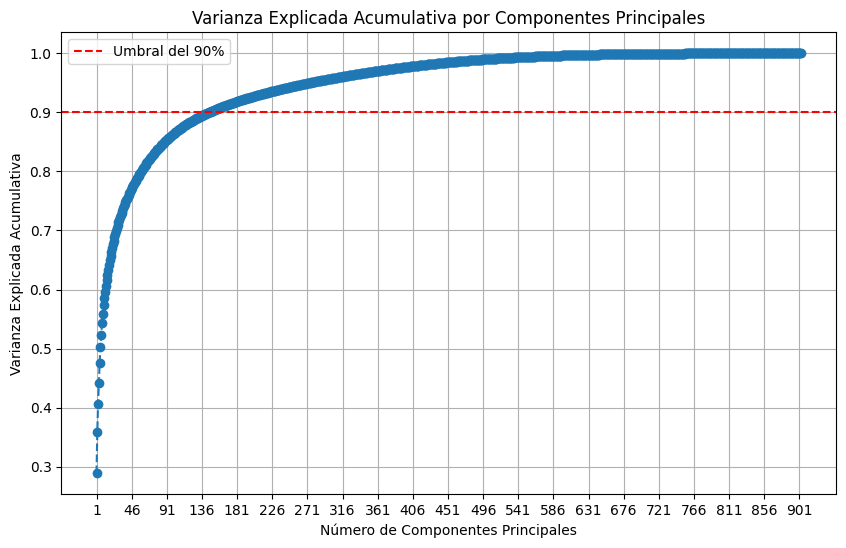

Las características más importantes para el primer componente principal:
QSOSW41       0.135306
QSOgrant41    0.130099
QSOSW39       0.129977
QSOgrant40    0.129893
QSOSW43       0.123994
QSOgrant39    0.123970
QSOgrant43    0.123528
QSOgrant42    0.120730
QSOSW45       0.120598
QSOSW44       0.120149
Name: 0, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paso 3: Aplicar PCA
pca = PCA()
pca.fit(X_reduced_df)

# Paso 4: Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_

# Paso 5: Graficar la varianza explicada acumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')

# Modificar los valores del eje X para ser más específicos
plt.xticks(np.arange(1, len(explained_variance) + 1, step=45))  # Ajustar el intervalo según sea necesario

plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--', label='Umbral del 90%')
plt.legend()
plt.show()


# Paso 6: Obtener las contribuciones de las características a los componentes
components_df = pd.DataFrame(pca.components_, columns=X_reduced_df.columns)

# Paso 7: Mostrar las características más importantes para el primer componente principal
n_top_features = 10  # Número de características a mostrar
top_features = components_df.iloc[0].abs().nlargest(n_top_features)
print("Las características más importantes para el primer componente principal:")
print(top_features)

In [ ]:
# Paso 8: Transformar los datos originales y crear un DataFrame reducido
n_components = 136  # Define el número de componentes que deseas mantener
pca_reduced = PCA(n_components=n_components)
df_reduced = pca_reduced.fit_transform(df_min_max)

# Crear un DataFrame con los datos reducidos
df_reduced_pca = pd.DataFrame(data=df_reduced, columns=[f'PC_{i+1}' for i in range(n_components)])

In [ ]:
df_reduced_pca.shape

(40840, 136)

##Unir descriptores calculados con Python con los de R

In [ ]:
df_properties = df_properties.merge(df_descriptors, on='id', how='right')

In [ ]:
df_properties.head()

,id,sequence,Longitud,Indice_Boman,Carga,Punto_Isoelectrico,Hidrofobicidad,A,R,N,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,peptide_0,GIGAVLKVLTTGLPALISWIKRKRQQ,26,0.570000,4.997093,12.546070,0.273077,7.692,7.692,0.000,...,0.020989,0.014686,0.012446,0.006902,0.002686,0.000000,0.000000,0.000000,0.00000,0.000000
1,peptide_1,GIGKFLHSAKKFGKAFVGEIMNS,23,0.419130,3.089488,10.802733,0.082609,8.696,0.000,4.348,...,0.009988,0.001179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,peptide_2,ILPWKWPWWPWRR,13,1.069231,2.997683,12.516461,-1.069231,0.000,15.385,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,peptide_3,KWCFRVCYRGICYRRCR,17,3.535294,5.748073,10.068130,-0.517647,0.000,29.412,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,peptide_4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,37,3.000000,6.002416,11.346921,-0.724324,0.000,13.514,2.703,...,0.025547,0.017740,0.022454,0.029931,0.022450,0.007209,0.014647,0.017532,0.01391,0.008937


In [ ]:
df_properties.to_csv('/content/drive/MyDrive/Colab Notebooks/AMP/df_descriptors.csv', index=False)

##Dataset final con características y variables objetivo

In [ ]:
pathpath = '/content/drive/MyDrive/Colab Notebooks/Laboratorio Integrado I/df_final.csv'
df_final = pd.read_csv(pathpath)

In [ ]:
df_final.iloc[:,2:12]

,Antimicrobiano,Antifúngico,Antiviral,Anti Gram +,Anti Gram -,Anticancerigeno,Antibacteriano,AntiVIH,Antiparasitario,Antitumoral
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
40835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final

,id,sequence,Antimicrobiano,Antifúngico,Antiviral,Anti Gram +,Anti Gram -,Anticancerigeno,Antibacteriano,AntiVIH,Antiparasitario,Antitumoral,Sufficient_AA_Diversity
0,peptide_0,GIGAVLKVLTTGLPALISWIKRKRQQ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
1,peptide_1,GIGKFLHSAKKFGKAFVGEIMNS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,True
2,peptide_2,ILPWKWPWWPWRR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
3,peptide_3,KWCFRVCYRGICYRRCR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,True
4,peptide_4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,peptide_43335,SNQKQALAQPQTFAHIRVFFRPLPFAFFGTVGFYS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
40836,peptide_43336,ETVDLKLNLQSNK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
40837,peptide_43337,DRALAPNIRSAKQMVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
40838,peptide_43338,HDNKSKNNTFNGAIAYVIPFLLFIFVIRSLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [ ]:
path_df_Y = '/content/drive/MyDrive/Colab Notebooks/AMP/df_final_positive.csv'

In [ ]:
df_final_positive = pd.read_csv(path_df_Y)

In [ ]:
df_final_positive.shape

(23105, 12)

In [ ]:
df_complete = df_properties.merge(df_final_positive, on=['id', 'sequence'], how='right')

In [ ]:
df_complete.to_csv('df_complete.csv', index=False)